<a href="https://colab.research.google.com/github/melekbairamova20/melekbairamova20/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

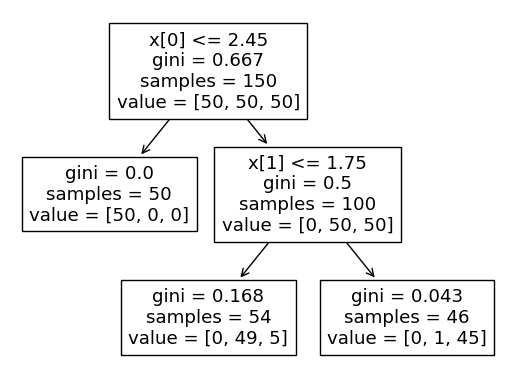

In [ ]:
tree.plot_tree(tree_clf);

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents = True, exist_ok = True)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

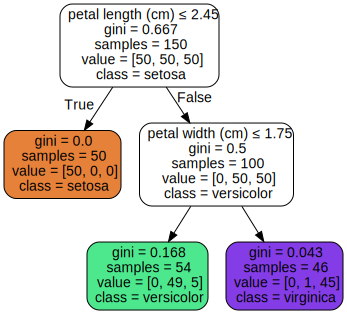

In [ ]:
dot_data = tree.export_graphviz(tree_clf, out_file=None,
                     feature_names=["petal length (cm)", "petal width (cm)"],
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

#Regularization Hyperparameters

In [ ]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X_moons, y_moons = make_moons(n_samples = 150, noise = 0.2, random_state = 42)

In [ ]:
tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5, random_state = 42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

#Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)
tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
new_values = np.linspace(-0.5, 0.5, 100).reshape(-1,1)
y_pred = tree_reg.predict(new_values)

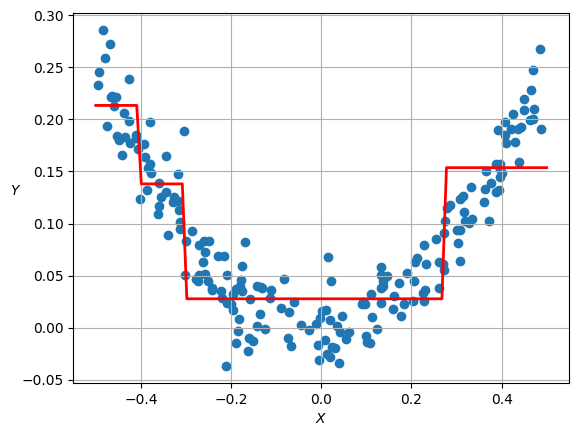

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_quad, y_quad)
plt.plot(new_values, y_pred, 'r-', linewidth = 2)
plt.xlabel("$X$")
plt.ylabel("$Y$", rotation = 0)
plt.grid()
plt.show()

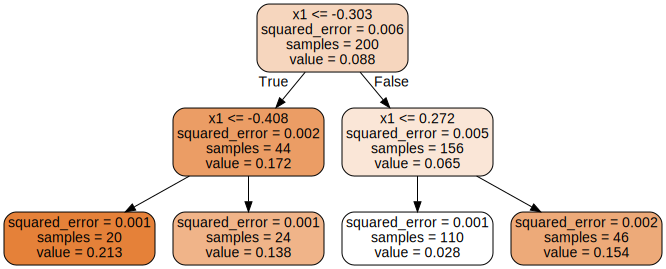

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_reg,
    out_file = str(IMAGES_PATH / "regression_tree.dot"),
    feature_names = ["x1"],
    rounded = True,
    filled = True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")